In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv


# Table of Contents <a class='anchor' id='backtotop'></a>
1. [Data Processing](#dataprocessing)
2. [Exploratory Data Analysis](#eda)
    1. [Key Points](#eda_keypoints)
    2. [Data Visualization](#eda_dataviz)
    3. [Correlation](#eda_corr)
3. [Model Training](#model)
    1. [Train Test Split](#model_traintestsplit)
    2. [Algorithm](#model_algo)

# Data Processing <a class='anchor' id='dataprocessing'></a>

[back to top](#backtotop)

In [2]:
# Lets import dataset

import pandas as pd
df = pd.read_csv("/kaggle/input/yeh-concret-data/Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Exploratory Data Analysis <a class='anchor' id='eda'></a>
[back to top](#backtotop)

In [3]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [4]:
if df.isnull().values.any():
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in dataset")

There are no NaN values in dataset


In [5]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Key Points <a class='anchor' id='eda_keypoints'></a>
[back to top](#backtotop)

1. <u>'cement'</u> - Median ~ Mean
2. <u>'slag'</u> - Mean > Median, which means the data is <b>skewed</b> (right)
3. <u>'flyash'</u> - Median = 0, Mean >  Median, data is <b>skewed</b> (right)
4. <u>'water'</u> - Median ~ Mean
5. <u>'superplasticizer'</u> -  Median ~ Mean
6. <u>'coarseaggregate'</u> - Median ~ Mean
7. <u>'fineaggregate'</u> - Median ~ Mean
8. <u>'age'</u> - Mean > Median, which means the data is <b>skewed</b> (right)

## Data Visualization <a class='anchor' id='eda_dataviz'></a>
[back to top](#backtotop)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_colwise(dframe, col_name:str):
    
    print("There are {} unique values in {} column".format(len(dframe[col_name].value_counts()), col_name))
    print(" ")
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    ax.bar(dframe[col_name].value_counts().index, df[col_name].value_counts())
    ax.set_title("Unique value plots for "+col_name+ ' column')


There are 278 unique values in cement column
 
There are 185 unique values in slag column
 
There are 156 unique values in flyash column
 
There are 195 unique values in water column
 
There are 111 unique values in superplasticizer column
 
There are 284 unique values in coarseaggregate column
 
There are 302 unique values in fineaggregate column
 
There are 14 unique values in age column
 
There are 845 unique values in csMPa column
 


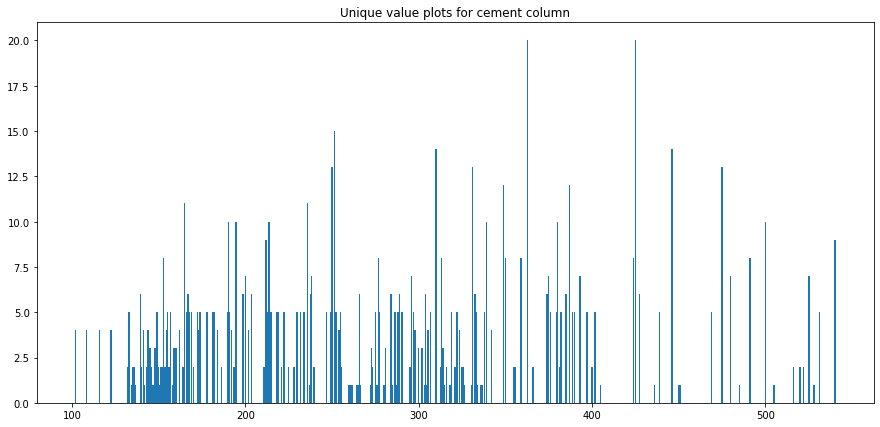

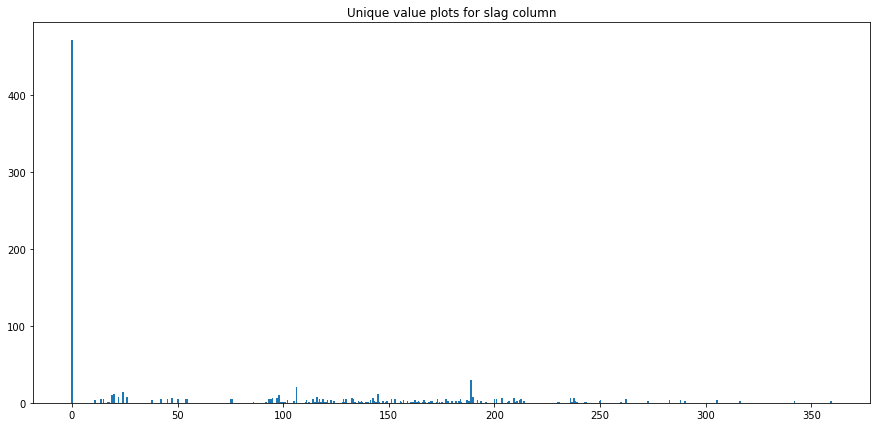

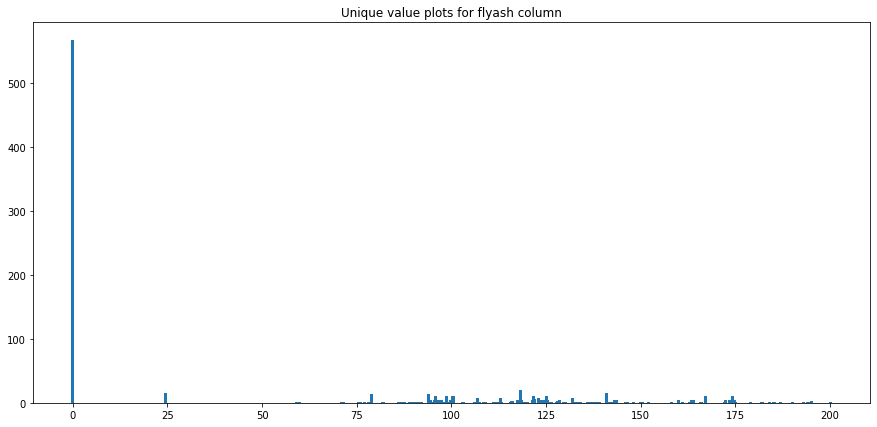

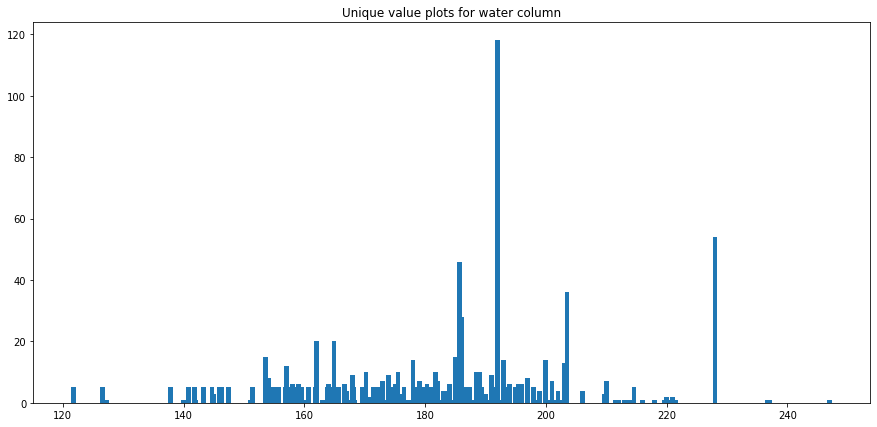

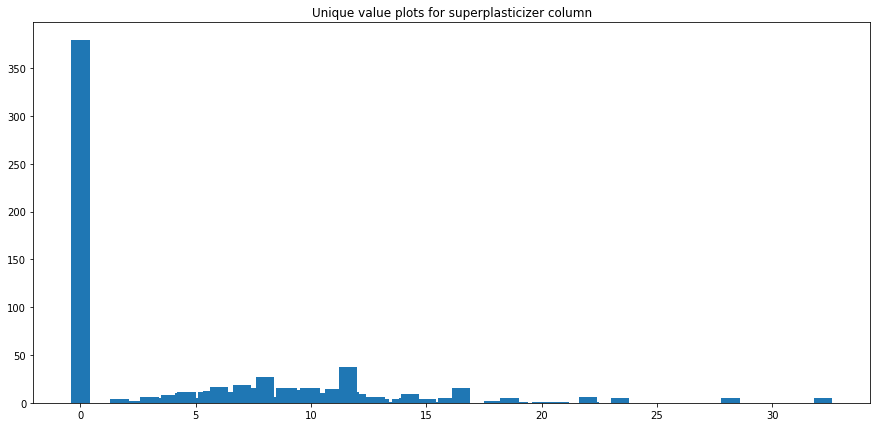

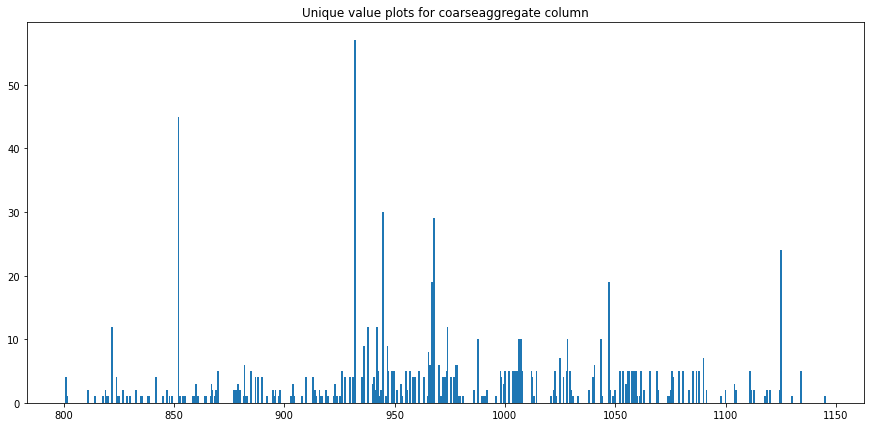

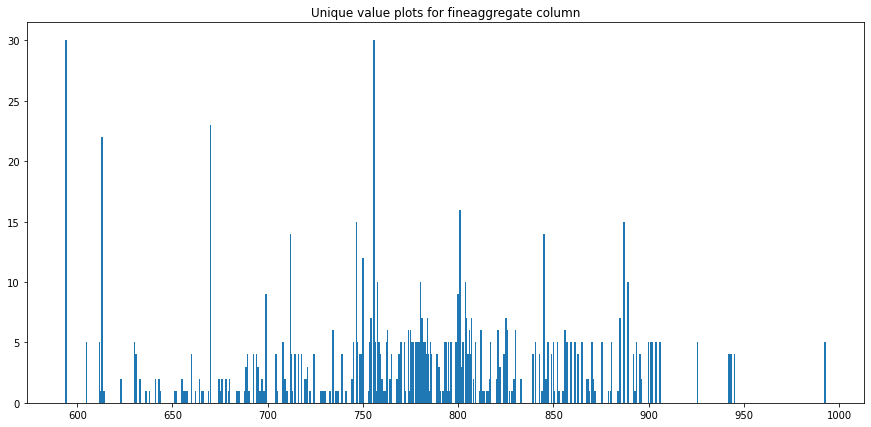

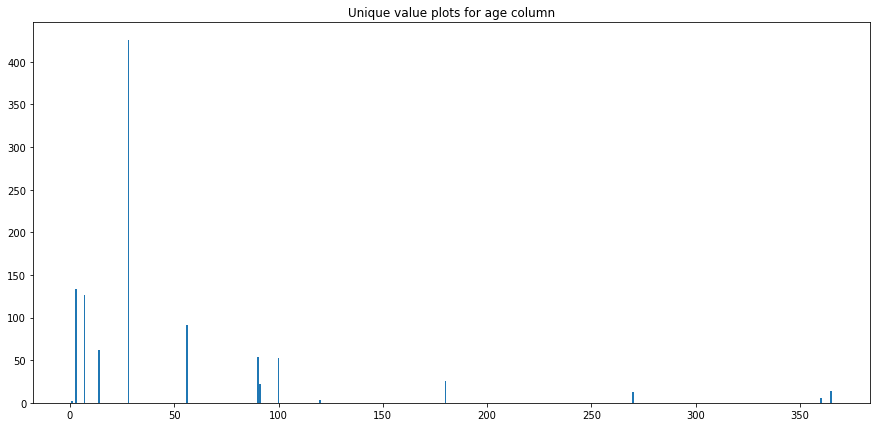

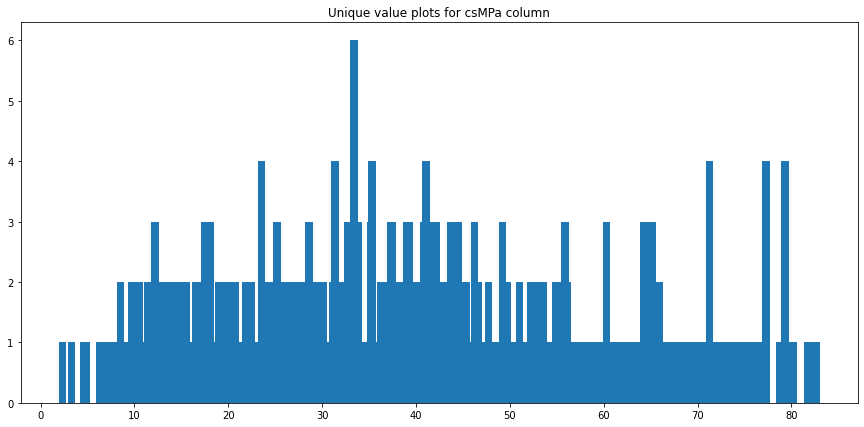

In [7]:
for j in df.columns:
    plot_colwise(df, j)

In [8]:
def plot_colwise_skewness(dframe, col_name:str):
    
    skew_val = dframe[col_name].skew()
    
    plt.figure(figsize=(15, 7))
    sns.histplot(dframe[col_name], kde=True, stat='density', label='Skew = %.3f' %skew_val,
                bins=30, color='r')
    plt.legend(loc='best')
    plt.title('Histogram for {} column'.format(col_name))

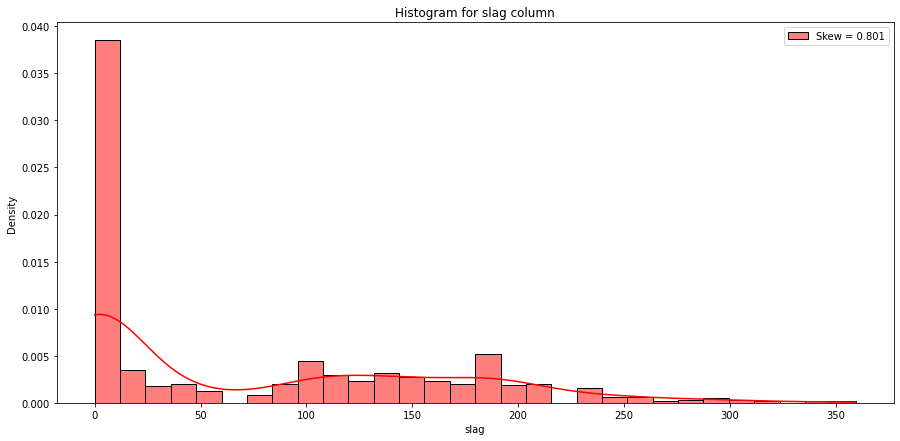

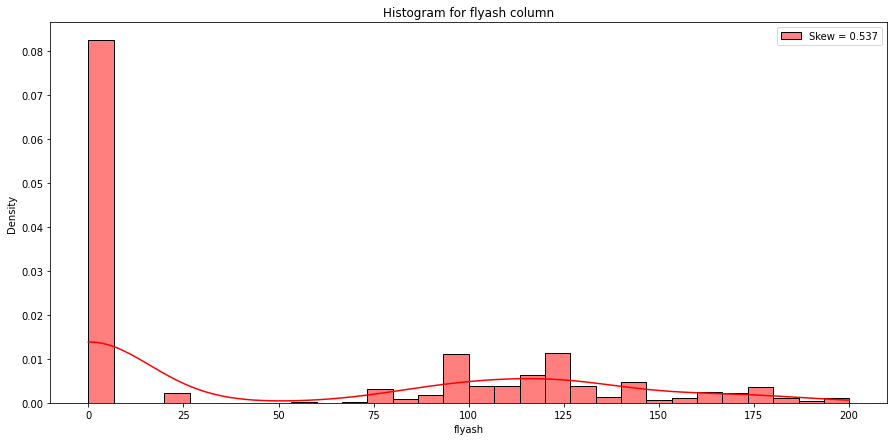

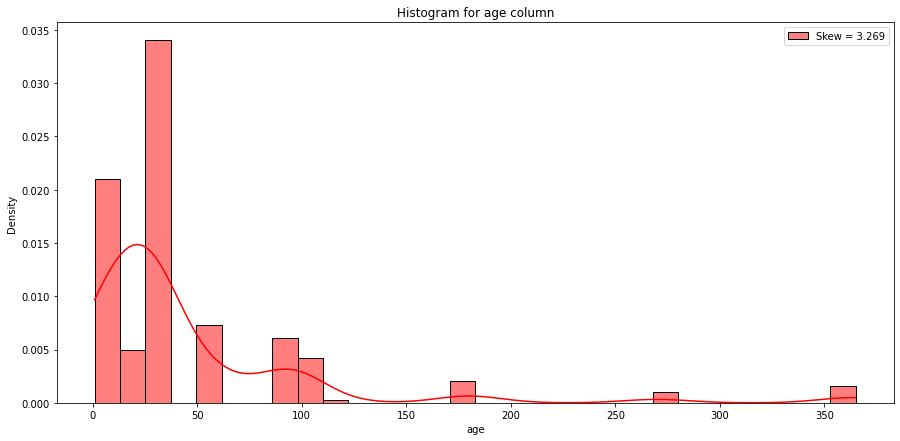

In [9]:
for j in ['slag', 'flyash', 'age']:
    plot_colwise_skewness(df, j)

## Correlation <a class='anchor' id='eda_corr'></a>
[back to top](#backtotop)

In [10]:
import seaborn as sns

<AxesSubplot:>

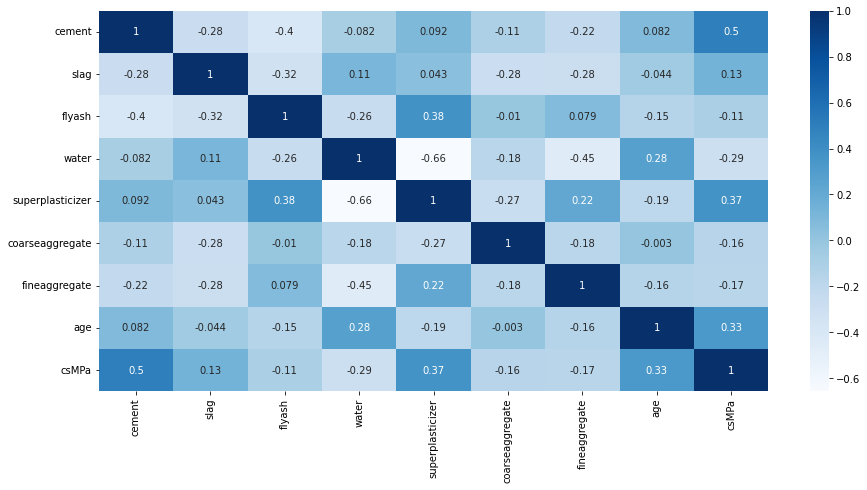

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

We'll have to find out how each of the independent variables correlate to the dependent variable / output.

In [12]:
import numpy as np 

corr_series = np.abs(df.corr().iloc[-1, :-1]).sort_values(ascending=False)
corr_series

cement              0.497832
superplasticizer    0.366079
age                 0.328873
water               0.289633
fineaggregate       0.167241
coarseaggregate     0.164935
slag                0.134829
flyash              0.105755
Name: csMPa, dtype: float64

Text(0.5, 1.0, 'Effect of IV on DV')

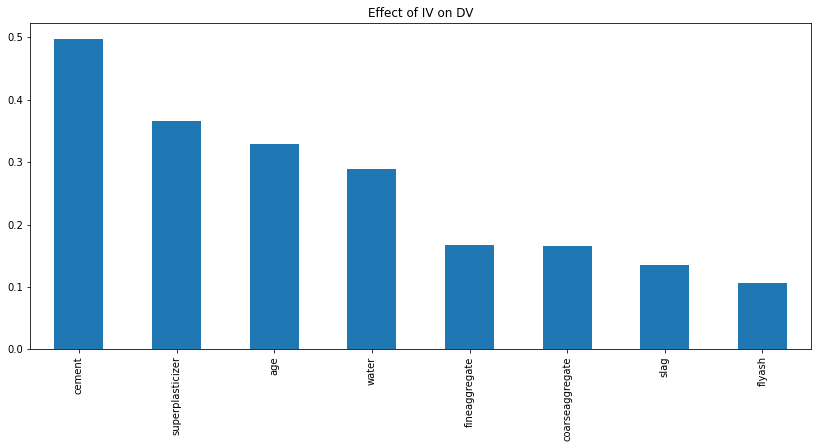

In [13]:
plt.figure(figsize=(14,6))
corr_series.plot(kind='bar')
plt.title("Effect of IV on DV")

# Model Training <a class='anchor' id='model'></a>
[back to top](#backtotop)

## Train Test Split <a class='anchor' id='model_traintestsplit'></a>
[back to top](#backtotop)

In [14]:
# Making X, y datasets from main dataset
X = df.drop('csMPa', axis=1)
y = df['csMPa']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(824, 8) (206, 8) (824,) (206,)


## Algorithms <a class='anchor' id='model_algo'></a>
[back to top](#backtotop)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('standarize',StandardScaler())
])

In [18]:
def train_model(algorithm, X_train, y_train):
    
    model = Pipeline(steps=[
        ('preprocessing', num_pipeline),
        ('algorithm', algorithm)
    ])
    
    model.fit(X_train, y_train)
    return model

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
algorithms = [RandomForestRegressor(), 
              GradientBoostingRegressor(),
              SVR(),
              DecisionTreeRegressor(),
              LinearRegression(), 
              KNeighborsRegressor()]

In [21]:
algo_name = []
algo_time = []
algo_mse = []
algo_mae = []

for algo in algorithms:
    name = type(algo).__name__
    algo_name.append(name)
    print(name)
    
    start_time = time.time()
    time.sleep(1)
    model = train_model(algo, X_train, y_train)
    end_time = time.time()
    print("Time taken: {}".format(end_time-start_time-1))
    algo_time.append(end_time-start_time-1)
    
    pred = model.predict(X_test)
    algo_mse.append(mean_squared_error(y_test, pred))
    algo_mae.append(mean_absolute_error(y_test, pred))

RandomForestRegressor
Time taken: 0.3913877010345459
GradientBoostingRegressor
Time taken: 0.1434791088104248
SVR
Time taken: 0.05013918876647949
DecisionTreeRegressor
Time taken: 0.010382890701293945
LinearRegression
Time taken: 0.02020120620727539
KNeighborsRegressor
Time taken: 0.00792384147644043


In [22]:
result_dict = {'Algorithm': algo_name, "MSE": algo_mse, "MAE": algo_mae, "Time": algo_time}

In [23]:
df_result = pd.DataFrame(result_dict)
display(df_result.sort_values(by='MSE'))

,Algorithm,MSE,MAE,Time
0,RandomForestRegressor,20.605443,3.243563,0.391388
1,GradientBoostingRegressor,24.889985,3.696356,0.143479
3,DecisionTreeRegressor,57.871164,4.866748,0.010383
5,KNeighborsRegressor,75.517389,6.908097,0.007924
2,SVR,91.524783,7.581353,0.050139
4,LinearRegression,95.617174,7.864642,0.020201
